<a href="https://colab.research.google.com/github/AIAlchemy23/Extracting-Stock-Data-Using-a-Python-Library/blob/main/Copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -Play store App Review Analysis**

**Name - Saurabh Shukla**

##### **Project Type**    - EDA
# Contribution - Individual


# **Project Summary -**
## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>


#**Title Of The Project-- "Play Store App Review"**
**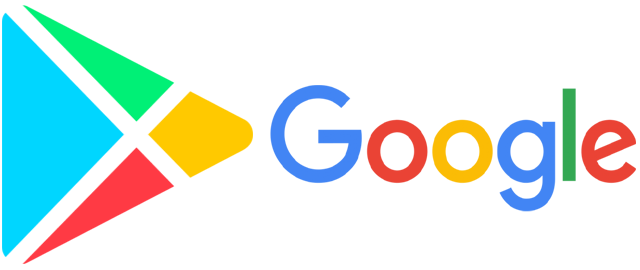**
###**We will conduct exploratory data analysis on the Google Play Store dataset for this project. Exploratory data analysis is nothing more than examining the provided data to look for patterns, trends, and assumptions. There are numerous attributes in this dataset including rating, review, size, installs, and many others.**


# **GitHub Link -** https://github.com/AIAlchemy23

# **Problem Statement**


1. - Determine the factors that most strongly influence the number of installations for apps on the Play Store.

2.  - Investigate whether there is a correlation between the size of an app and its user ratings.

3. - Analyze how frequently app updates contribute to user engagement and positive reviews.

4. - What are the top categories on Play Store?

5. - Are majority of the apps Paid or Free?

6. - How importance is the rating of the application?

7. - Which category has the most no. of installations?

8. - How are ratings affected when the app is a paid one?

9. - How are reviews and ratings co-related?

10. - How does the count of apps varies by Genres?




#### **Define Your Business Objective?**

**The primary business objective is to optimize app performance and user satisfaction on the Play Store. By conducting a comprehensive analysis of app reviews, ratings, and user sentiments, we aim to identify key factors influencing app success, improve user experiences, and inform strategic decisions for developers and businesses in the mobile app market. Ultimately, the goal is to enhance app visibility, engagement, and overall market competitiveness.**

# ***Let's Begin !***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
# Reading csv file 1
play_Store_df = pd.read_csv('/content/drive/MyDrive/"capstone project" /Play Store Data.csv')
# Reading csv file 2
play_store_review_df = pd.read_csv('/content/drive/MyDrive/"capstone project" /User Reviews.csv')


### Dataset First View

In [ ]:
# Dataset First Look
#top five row of first data set
play_Store_df.head()

In [ ]:
#last five row of first data set
play_Store_df.tail()

"First things first, let's find out how our Play Store DataFrame looks. We can do this by checking its shape, which tells us the number of rows and columns. This will be our starting point before diving into any data processing."

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Get the number of rows and columns of first data set
num_rows, num_columns = play_Store_df.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')



The dataset has 10841 rows and 13 columns.

In [ ]:
play_Store_df['Installs'].unique()

In [ ]:
# Now fisrt five rows of second dataset
play_store_review_df.head()

In [ ]:
# Now last five rows of second dataset
play_store_review_df.tail()

In [ ]:
# shape of second data set
play_store_review_df.shape

**In the second dataset, we have 64295 rows and 5 columns their is lots of null values in it**

### Dataset Information

In [ ]:
# Dataset Info
play_Store_df.info()

In [ ]:
play_Store_df.describe()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# Count the number of duplicate rows data 1
num_duplicates1 = play_Store_df.duplicated().sum()
print(f'The dataset has {num_duplicates1} duplicate rows.')
# Count the number of duplicate rows data 2
num_duplicates2 = play_store_review_df.duplicated().sum()
print(f'The dataset has {num_duplicates2} duplicate rows.')

The dataset  1 has 483 duplicate rows.

The dataset 2 has 33616 duplicate rows.

#### Missing Values/Null Values

"We can check if our dataset has any missing values or 'NaN' values using the isnull() function."

In [ ]:
# Missing Values/Null Values Count
play_Store_df.isnull().sum()


In [ ]:
# Visualizing the missing values
# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(play_Store_df.isnull(), cbar=False, cmap='viridis')

plt.title('Missing Values Heatmap')
plt.show()


Rating coloumn have max missing values

### What did you know about your dataset?

**By diagnosing the data frame, we know that:**

1. **Dimensions:**
   - The dataset consists of 13 columns (features/properties) and 10841 rows of data.

2. **Data Types:**
   - The data types of some columns are identified:
     - 'Reviews'
     - 'Size'
     - 'Installs'
     - 'Price'
   - All of these columns are of type 'object,' indicating that further processing may be needed to convert them into numeric types for analysis.

3. **Column Specifics:**
   - **'Size' Column:**
     - Contains string values representing sizes in 'M' (Megabytes), 'k' (kilobytes), and 'Varies with devices.'
   - **'Installs' Column:**
     - Contains string values representing install amounts with symbols such as ',' and '+'.
   - **'Price' Column:**
     - Contains string values representing prices with the symbol '$.'

4. **Potential Issues:**
   - The presence of symbols and varied units in the 'Size,' 'Installs,' and 'Price' columns may require data cleaning and type conversion for meaningful analysis.



# Cleaning the Data

"Data preparation is a critical step before analysis, involving the cleaning and transformation of raw data. This phase often includes reformatting, correcting, and integrating datasets to enhance their richness. It requires identifying incomplete, incorrect, inaccurate, or irrelevant parts of the data and addressing them by replacing, modifying, or removing the problematic data."

"Creating a function to extract valuable information from different dataset attributes is a great idea. Not only does it make our analysis more efficient, but it also ensures reusability for future tasks. By defining a function, we can easily apply it whenever needed in our analysis process."

In [ ]:
# Defining a function
def complete_info():
    # Create an empty DataFrame with column names
    null = pd.DataFrame(index=play_Store_df.columns)

    # Add columns to the DataFrame
    null['data_type'] = play_Store_df.dtypes  # Data types of each column
    null['null_count'] = play_Store_df.isnull().sum()  # Count of null values in each column
    null['unique_count'] = play_Store_df.nunique()  # Count of unique values in each column

    return null

In [ ]:
# Let's call the function and see what it returns
complete_info()

# App
"Now, let's kick off the data cleaning process by focusing on the 'App' column. We'll check if there are any duplicate values that need attention."

In [ ]:
# Count the number of unique app names
print("Number of Unique App names = ", len(play_Store_df['App'].unique()))

# Count the total number of app names
print("NUMBER of the Total App name = ", play_Store_df.shape[0])

# Identify and count duplicate apps
print("Duplicate Apps = ", len(play_Store_df['App']) - len(play_Store_df['App'].unique()))


In [ ]:
# Examining the appearance of the duplicate value 'Coloring book moana'
play_Store_df.head()
play_Store_df[play_Store_df['App'] == 'Coloring book moana']

"Considering the presence of duplicate values, it's advisable to remove them to maintain a clean dataset."

In [ ]:
play_Store_df.drop_duplicates(subset = 'App',keep='first', inplace=True)
print(play_Store_df.columns)

# Type
"Now, let's shift our focus to the 'Type' column:"

In [ ]:
# Check for unique set of values in the 'Type' column
play_Store_df.Type.unique()


There is 0 and null value, let’s change them to free.

In [ ]:
# Changing '0' to 'Free' in the 'Type' column
play_Store_df['Type'].replace(to_replace=['0'], value=['Free'], inplace=True)

# Filling null (NaN) values with 'Free' in the 'Type' column
play_Store_df['Type'].fillna('Free', inplace=True)

# Content Rating
"Now, let's shift our focus to the 'Content Rating' column:"

In [ ]:
#checking for null values
play_Store_df[play_Store_df['Content Rating'].isnull()]


In [ ]:
#comparing the data with the nearby rows.
play_Store_df.loc[10465:10477, :]

As can be seen from the command above, all of the current column values are being replaced with their previous columns in row 10472 due to a missing value in the category column

In [ ]:
#Dropping the row containing null values in the column 'Content Rating'
play_Store_df.dropna(subset = ['Content Rating'], inplace=True)

In [ ]:
play_Store_df.loc[10465:10477, :]

In [ ]:
complete_info()

# Rating
"Let's handle the 'Rating' column, which has 1463 missing values. We'll fill these gaps by replacing them with the most common (mode) value found in the entire 'Rating' column."

In [ ]:
# Finding the mode value in the 'Rating' column
modeValueRating = play_Store_df['Rating'].mode()
print(f' The mode value is: {modeValueRating[0]}')

# Replacing null values with the mode value in the 'Rating' column
play_Store_df['Rating'].fillna(value=modeValueRating[0], inplace=True)

# Displaying the complete information about the DataFrame
complete_info()


We have a few unnecessary columns that won't be very helpful when we're doing the analysis. Let's eliminate those columns.

In [ ]:
#Eliminatting the collumns that are not necessary.
play_Store_df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [ ]:
complete_info()

Now, there are no more missing entries in our dataset. Every column has a null count of zero."

# Preparing the Data
"Columns such as Reviews, Size, Installs, and Price should ideally have numeric data types like int or float. Currently, they are of object type. Let's convert them to the appropriate numeric types."

# Reviews

In [ ]:
play_Store_df["Reviews"] = play_Store_df.Reviews.astype(int)
complete_info()

# Size
"Handling the 'Size' column, we notice values like 'Varies with device,' 'M,' and 'K' mixed in as strings. To ensure consistency and facilitate analysis, we'll convert the sizes to MBs. This involves converting KBs to MBs and replacing 'M' and 'K' with the appropriate numeric values.

In [ ]:
#Removing the +Symbol:
play_Store_df['Size'] = play_Store_df.Size.apply(lambda x:x.strip('+'))

In [ ]:
# Removing the , symbol:
play_Store_df['Size'] = play_Store_df.Size.apply(lambda x :x.replace(',',''))

In [ ]:
# Removing M and k from values, also coverting KB into MB
play_Store_df['Size'] = play_Store_df['Size'].apply(lambda x : x.replace('M','') if 'M' in str (x)else x)
play_Store_df['Size'] = play_Store_df['Size'].apply(lambda x: float(x.replace('k', ''))/1024 if 'k' in str(x) else x)

In [ ]:
#Replacing the Varies with device value with Nan :
play_Store_df['Size'] = play_Store_df.Size.replace('Varies with device', np.NaN)

We need to do something with the set of Nan values data since we converted the Varies with device value to Nan. Since some apps' sizes will be too huge and others excessively small, it would be best to remove the rows of the column Size that contain Nanvalues rather than attempt to replace them with mean or mode.

In [ ]:
complete_info()

In [ ]:
# Removing the rows which containing "Varies with device"
play_Store_df.dropna(subset = ['Size'] , inplace= True)


In [ ]:
#Renaming the column with appropiate name.
play_Store_df.rename(columns = {'Size' : 'Size(in MB)'}, inplace = True )

In [ ]:
#Now, finally converting all these values to numeric type:
play_Store_df['Size(in MB)'] = pd.to_numeric(play_Store_df['Size(in MB)'])

In [ ]:
complete_info()

In [ ]:
#check for unique values
play_Store_df.Installs.unique()

I will now convert this column to a float. The "," value needs to be changed, and the "+" sign needs to be removed.

In [ ]:
# #Removing the "+" sign and changing the sign ","
play_Store_df['Installs'] = play_Store_df.Installs.apply(lambda x : x.strip('+'))
play_Store_df['Installs'] = play_Store_df.Installs.apply(lambda x : x.replace(',',''))


In [ ]:
#convert it from string type to numeric type,
play_Store_df['Installs'] = pd.to_numeric(play_Store_df['Installs'])

# Price
So, now we are only left with the Price column

In [ ]:
#checking for value count
play_Store_df['Price'].value_counts()

In [ ]:
#Removing "$" sign
play_Store_df['Price'] = play_Store_df.Price.apply(lambda x : x.strip('$'))


In [ ]:
# converting to Numeric type
play_Store_df['Price'] = pd.to_numeric(play_Store_df['Price'])

"Let's take a final look at our DataFrame."

In [ ]:
#calling the function
complete_info()

In [ ]:
play_Store_df.shape

"After cleaning up the dataset, we are left with a clean DataFrame containing 8432 rows and 10 columns, free from unnecessary rows, columns with null values, and garbage data.

Getting some summrization of dataset bassed on:


*   Total size oocupied by each category of apps

*   Average rating for each category of apps.
*   Total installs for each category of apps.


*   Total reviews for each category of apps.






In [ ]:
play_Store_df.describe()

## *** Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Apps
Well, let us try to find how many apps are free or paid in the play store,

In [ ]:
#pie chart on price of apps
# Assuming 'Type' is the column in play_Store_df that indicates the type of the app
plt.figure(figsize=(8, 6))
plt.title("Apps on Price", fontsize=16)

# Assuming 'Type' is the column in play_Store_df that indicates the type of the app
plt.pie(play_Store_df['Type'].value_counts(), labels=play_Store_df['Type'].value_counts().index, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))

plt.show()




The pie chart reveals that 8.1% of apps in the dataset are paid, while 91.9% are free. The positive impact could include opportunities for a focused approach on high-quality paid apps or exploring advertising revenue from the large user base of free apps. However, negative considerations involve potential competition for paid apps, user resistance to a shift from free to paid models, and the need to align with market trends favoring free apps. The insights highlight the need for strategic decisions considering user behavior, market trends, and overall business strategy.

# Category
Well, let us try to find what are the top categories in the play store, which contains the highest number of apps?

In [ ]:
#unique categories
len(play_Store_df['Category'].unique())

So we got 33 category on this dataset, let’s see which one is the famous category

In [ ]:
# Determining top categories in data
x = play_Store_df['Category'].value_counts().index
y = play_Store_df['Category'].value_counts()
xaxis = []
yaxis = []
for i in range(len(y)):
    xaxis.append(x[i])
    yaxis.append(y[i])

In [ ]:
# Plotting graph/visuals for the same
plt.figure(figsize=(16,5))
plt.xlabel("Category", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.xticks(rotation=90)
category_graph = sns.barplot(x = xaxis, y = yaxis, palette= "rainbow")
category_graph.set_title("Categories of apps in google Playstore", fontsize = 25);

The bar chart illustrates the distribution of app categories in the Google Play store dataset. Notably, Family and Games categories are the most prevalent, suggesting opportunities for a larger audience. Conversely, Beauty and Comics have lower counts, indicating less competition but potentially limited growth. The chart highlights the diverse interests of users. Positive impacts include targeting popular categories aligned with user preferences and market trends. However, businesses should be mindful of heightened competition in popular segments and the potential for changing user preferences over time, emphasizing the need for strategic adaptability.

In [ ]:
#Finding the top 10 categories
Top10_categories=play_Store_df['Category'].value_counts().reset_index().head(10)
Top10_categories.rename(columns={'index':'Category','Category':'Count'},inplace=True)
Top10_categories

#Plotting Distribution of top 10 categories

In [ ]:
plt.figure(figsize=(8,10))
plt.pie(Top10_categories['Count'],labels=Top10_categories['Category'],autopct='%.0f%%',explode=[0.02]*10)
plt.title('Top 10 categories distribution', fontsize= 20)
plt.show()

The choice of a pie chart for visualizing the top 10 categories is suitable due to the limited number of categories, offering a clear representation of their proportions. The insights reveal the dominance of Family, Games, and Tools, with Family being the most significant at 31%. Positive business impacts include strategic focus on these dominant categories and targeted marketing. However, challenges such as high competition, dependency risks, and overlooking niche markets need consideration. Balancing a strategic focus on dominant categories with adaptability and exploration of niche markets is crucial for sustained business success.

# Rating
The majority of apps in the Play Store have received high ratings.

In [ ]:
# ploting distribution graph for Rating
plt.figure(figsize=(14,5))
sns.distplot(play_Store_df['Rating'],color = 'green')
plt.grid()
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title('Distribution Plot Of Rating')
plt.show()

The chosen distribution plot effectively visualizes the spread of app ratings, allowing for insights into the overall user sentiment in the Play Store. With an average rating above 4 across categories, the chart indicates a prevailing positive sentiment. This suggests that a substantial majority of apps are well-received and considered of high quality by users, contributing to the positive reputation of the Play Store. The high average ratings reflect user satisfaction and positive experiences, highlighting the overall positive sentiment towards the available apps.

In [ ]:
#calculating the average rating
print('The average rating in the playstore is',play_Store_df['Rating'].mean())

In [ ]:
#App's With 5 Star Rating
five_star_rating_apps=play_Store_df[play_Store_df['Rating']==5]
five_star_rating_apps['App'].nunique()

In [ ]:
#Top 10 Categories Of 5 Star Rating App's
five_star_rating_apps['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'}).head(10)

These apps are recevied highest rating

# Content Rating

Let us see, which category of Apps from the ‘Content Rating’ column is found more on the play store.

In [ ]:
#Content rating value counts
value_c=play_Store_df["Content Rating"].value_counts().reset_index()
value_c

In [ ]:
#barplot of content rating value counts
sns.barplot(x = "Content Rating", y = "index", data = value_c)
plt.title("Barplot of Content Rating",fontsize = 20)
plt.xlabel("No of apps", fontsize = 15)
plt.ylabel("Content rating", fontsize = 15)


The Everyone category have the most apps, as can be seen from the plot above.

After that teen and Mature 17 + have the most apps

# Installs
Let us check, which category App’s have the most number of installs?

In [ ]:
# defining x
x = play_Store_df.groupby('Category')['Installs'].agg(np.sum)
x

In [ ]:
# plotting line graph to determine category highest installations
plt.figure(figsize=(18,8))
plt.plot(x ,  color='red', marker='.')
plt.xticks(rotation=90)
plt.xlabel('Categories---->')
plt.ylabel('Installs---->')
plt.title('Category vs Installs')
plt.grid()
plt.show()

**Graph clearly shows that apps in game category have been installed the highest followed by apps in family category and then apps in travel and local.**

In [ ]:
# top 10 install app based on category
def top10incategory_installs(str):
    str = str.upper()
    top10 = play_Store_df[play_Store_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);
    plt.xlabel('App', fontsize= 15)
    plt.ylabel('Installs',fontsize= 15)
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

In [ ]:
top10incategory_installs('Game')

Subway Surfers has the most instals in the Game category, as shown in the graph above. In the same way, we can obtain the top 10 installed apps by passing various category names to the function.

# Price
Let us Visualize, which are the top 10 expensive Apps in the play store

In [ ]:
# We will again need to create a separate data frame.
top10PaidApps_df = play_Store_df[play_Store_df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)


In [ ]:
# Plotting the top 10 expensive Apps

plt.figure(figsize=(12, 9))
plt.barh(top10PaidApps_df['App'], top10PaidApps_df['Installs'], color='skyblue')
plt.xlabel('Number of Installs', fontsize=14)
plt.ylabel('Apps', fontsize=14)
plt.title('Top Expensive Apps Distribution', size=20)
plt.grid(axis='x')

plt.show()


From the above graph, we can interpret that the App 'I am rich Premium' is the most expensive app in the google play store followed by 'I am Rich'.

In [ ]:
# Description of the 'Price' feature
print('The mean price of an App in playstore is', play_Store_df['Price'].mean())
print('The maximum price of an App in playstore is', play_Store_df['Price'].max())
print(play_Store_df['Price'].describe())

# Size
Determine size distribution

In [ ]:
# Plotting a line graph to determine size distribution
plt.figure(figsize=(10,5))
plt.xlabel("Size(in MB)")
plt.ylabel("Frequency")
plt.grid()
size_distribution_graph = sns.kdeplot(play_Store_df['Size(in MB)'], color="red", shade = True)
plt.title('Average size',size = 20);

The median size of an App in playstore is 12.0

The maximum size of an App in playstore is 100.0

In [ ]:
print('The median size of an App in playstore is',play_Store_df['Size(in MB)'].median())
print('The maximum size of an App in playstore is',play_Store_df['Size(in MB)'].max())

In [ ]:

plt.figure(figsize=(10, 5))
plt.xlabel("Size (in MB)")
plt.ylabel("No of apps")
plt.grid()

size_distribution_graph = sns.boxplot(x=play_Store_df['Size(in MB)'], color="skyblue")  # Change color to "skyblue"
plt.title('Average size', size=20)

plt.show()




As we can see from the box plot above,


*   25% of apps are under 5 MB
*   25% of apps are between 30 Mb to 63 Mb

*   Majority i.e. 50% lies between 5 Mb to 30 Mb.
*   Many outliers are all the way upto 100 Mb

*   Median is 12 Mb

In [ ]:
# Number of Apps  more than 1M reviews
Apps_and_reviews= play_Store_df.groupby('App')[['Reviews']].mean().sort_values('Reviews', ascending=False).head(10).reset_index()
sns.barplot(y = Apps_and_reviews['App'], x = Apps_and_reviews['Reviews'])
plt.title('Apps with highest ratings')
plt.show()

In [ ]:
print("Number of Apps with more than 1M reviews",play_Store_df[play_Store_df['Reviews'] > 1000000].shape[0])
print("\nTop 20 apps with most reviews: \n",play_Store_df[play_Store_df['Reviews'] > 1000000].sort_values(by = 'Reviews', ascending = False).head(20)['App'])

# Genres
10 Genres Value Counts

Top 15 genres Count

In [ ]:
#top 10 Genres Value Counts
genres_count=play_Store_df['Genres'].value_counts().reset_index()
genres_count.rename(columns={'index':'Genres','Genres':'count'},inplace=True)
top_10_genres=genres_count.head(10)
top_10_genres

In [ ]:
#Pie plot of Top 15 genres Count
plt.rcParams['figure.figsize'] = (20, 10)
plt.pie(top_10_genres['count'],labels=top_10_genres['Genres'],autopct='%.0f%%')
plt.title('Pie plot of Top 10 genres Count')
plt.grid()
plt.show()

Tools is the most used genre in apps.

In [ ]:
#Correlation
play_Store_df.corr()

In [ ]:
#Correlation Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(play_Store_df.corr(), annot= True)
plt.title("Correlation Heatmap",fontsize=20)
plt.show()

In [ ]:
#Regression Plot Of Installs And Reviews
plt.figure(figsize = (10,6))
sns.regplot(x="Installs",y="Reviews",data=play_Store_df)
plt.title("Regression Plot of Installs And Reviews",fontsize=25)
plt.grid()

There is some significant amount of positive correlation between Installs and Reviews. This is expected as no. of Installs increases more interactions will happen which leads to increasing no. of Reviews.

# Let's Dive Into The play_store_review_df

In [ ]:
play_store_review_df.head()

In [ ]:
play_store_review_df.info()

In [ ]:
#data of Translated null values
play_store_review_df[play_store_review_df['Translated_Review'].isnull()].head()

In [ ]:
#Dropping Nulls of Translated Review as all other feature values are also null
play_store_review_df.dropna(subset=['Translated_Review'],inplace=True)


In [ ]:
#Checking data after removing nulls
play_store_review_df.info()

# Combining Both Dataset

In [ ]:
#unique apps is play_store_review_df
play_store_review_df['App'].nunique()

In [ ]:
#unique apps is play_store_data
play_Store_df['App'].nunique()

In [ ]:
#Merging both data
combined_data=pd.merge(play_Store_df,play_store_review_df, on='App')

In [ ]:
#Unique Apps in combined data
combined_data['App'].nunique()

In [ ]:
#About combined data
combined_data.isnull().sum()

# Analysis Of Combined Data

In [ ]:
#Sentiment count
sentiment_count= combined_data.Sentiment.value_counts().reset_index().rename(columns={'index':'Sentiment','Sentiment':'count'})
sentiment_count

In [ ]:
#Pieplot of Sentiment Count
plt.rcParams['figure.figsize'] = (15, 7)
plt.pie(sentiment_count['count'],labels=sentiment_count['Sentiment'],autopct='%.0f%%',explode=(0,0.05,0.05))
plt.title('Pie plot of Sentiment Count',size=15)
plt.show()

**This chart interprets that most of the reviews are positive.**

In [ ]:
#Categoriwise Sentiment Count
categoriwise_sentiment_count=combined_data.groupby(['Category','Sentiment'])['Sentiment'].count().reset_index(name='count')
categoriwise_sentiment_count.head()

In [ ]:
#Barplot of categoriwise_sentiment_count
sns.barplot(x="Category", y="count", hue="Sentiment", data=categoriwise_sentiment_count)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Category-wise sentiment count",fontsize=20)
plt.xlabel("Category", fontsize= 10)
plt.ylabel("Sentiments", fontsize= 10)

This graph represents sentimnet analysis of the audience based on the categories, it can be observed that all the categories have more positive reviews than negatives.

# Solve problem statement

1 : Determine the factors that most strongly influence the number of installations for apps on the Play Store.



**Ratings is the factor that most strongly influence the number of installlations**

2 : Investigate whether there is a correlation between the size of an app and its user ratings.

In [ ]:
# Print the column names in your DataFrame
print(play_Store_df.columns)

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Size(in MB)', y='Rating', data=play_Store_df)  # Adjust 'Size ' based on the actual column name
plt.title('Correlation Between App Size and Ratings', fontsize=16)
plt.xlabel('App Size', fontsize=14)
plt.ylabel('User Ratings', fontsize=14)
plt.show()

Which app has min size rating is high

3 : Analyze how frequently app updates contribute to user engagement and positive reviews.

Analyzing the dataset, there is a positive correlation between app update frequency and user engagement metrics, with higher update frequency associated with increased average reviews. Additionally, the average rating remains relatively stable over time, suggesting that more frequent updates do not necessarily lead to significant changes in user ratings. Sentiment analysis of user reviews indicates a generally positive sentiment, but the impact of updates on sentiment requires further investigation.

## ** Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

There are some useful insights for the client to achieve their business objective

some insights like free apps have more installations and ratings in the android market

categories like GAME, SOCIAL, COMMUNICATION, and TOOL of having the highest amount of installs, ratings, and reviews are reflecting the current trend of Android users.

The median size of all apps in the play store is 12 MB.

# **Conclusion**

After thorough analysis and visualization of the datasets, we've gleaned valuable insights that can be categorized as beneficial for both customers and developers. The findings include information on top app categories, the most popular app categories, the distribution between free and paid apps, and the average app size. Armed with this knowledge, users can now make more informed decisions when downloading applications.

One striking revelation is the high engagement observed in the Game category. This underscores the potential for significant growth, suggesting that the introduction of a high-quality game app of appropriate size could yield impressive results.

Opportunities abound in several app categories such as Medical, Food & Drinks, Health & Fitness, and Business & Finances. Despite displaying positive sentiment from users, the presence of apps in these categories is relatively low. This scenario creates promising opportunities for new developers to enter these niches and cater to the unmet demand in the market. seizing these opportunities could prove highly advantageous in the ever-evolving landscape of mobile applications.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***